# **Northern Leaf Blight Disease Detection Using Image Classification**

### **1. PROJECT OVERVIEW**

Agriculture plays a pivotal role in Kenya's economy with a substantial number of farmers engaged in maize cultivation, a vital food crop consumed by over 80% of the population. Maize is cultivated across various regions of Kenya, even in areas where it may not be ideally suited. The predominant challenge faced by maize farmers is the prevalence of Northern Leaf Blight (NLB), a disease that poses a continuous threat from the early growth stages to maturity. Managing and controlling Northern Leaf Blight (NLB) is both costly and complex. The disease can lead to substantial maize yield losses, ranging from 40% to 70%. This extensive reduction in maize production poses a significant risk to food security in the country. This project therefore aims to contribute to the agricultural sector by providing an efficient and accurate tool for Northern Leaf Blight (NLB) disease detection. This project not only addresses a pressing issue in maize farming but also demonstrates the potential of machine learning and computer vision in revolutionizing agricultural practices.

###**2. BUSINESS UNDERSTANDING**

**2.1 PROBLEM STATEMENT**

Northern Leaf Blight (NLB) is a fungal disease that affects maize plants, causing significant yield losses if not detected and treated early. Traditional methods of disease detection are time-consuming and often rely on manual inspection, making them impractical for large-scale farming operations. This project leverages machine learning and computer vision techniques to create an automated system for Northern Leaf Blight (NLB) disease detection, enabling early intervention and improved crop management.

**2.2 PROJECT OBJECTIVES**

*   Develop an automated NLB disease detection system using image classification techniques;
*   Enable early and accurate identification of NLB-infected maize plants;
*   Create a user-friendly interface for farmers to access and utilize the system in the field;
*   Reduce the reliance on manual inspection methods, saving time and  resources for farmers.

**2.3 STAKEHOLDERS**

*   Farmers
*   Government Agencies
*   Research Institutions

###**3. METHODOLOGY**

The project will employ the following methodology:

1.   Data Collection: Gather a diverse dataset of maize plant images, including both healthy and NLB-infected plants.
2.   Preprocessing: Clean and preprocess the image dataset to prepare it for model training.
3.   Model Development: Build and train a deep learning-based image classification model to differentiate between healthy and NLB-infected maize plants.
4.   Model Evaluation: Assess the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.
5.   Deployment: Create a user-friendly interface, potentially as a mobile or web application, for farmers to upload images and receive NLB disease predictions.
6.  Validation and Feedback: Collect feedback from users to fine-tune the system and improve its accuracy and usability.

###**4. DATA UNDERSTANDING**

**4.1 DATA SOURCE**

 The project capitalizes on data that is publicly accessible through the Open Science Framework (OSF) as its primary resource.[Data Source](https://osf.io/p67rz/).


The chosen data is particularly advantageous for our initiative as it encompasses a wide array of images depicting both healthy maize plants and those infected with Northern Leaf Blight (NLB). These images are not only diverse but also come with labels, enhancing the dataset's value. The data's public availability ensures inclusivity and adherence to ethical research practices.

Furthermore, it upholds scientific integrity, being sourced from a well-recognized institution such as the Open Science Framework (OSF). Utilization of this dataset is crucial as it empowers us to develop a sturdy model capable of identifying NLB disease in maize plants through sophisticated image classification methodologies.

Significantly, this dataset represents the most extensive publicly accessible compilation of categorized images relating to a singular plant disease, thereby standing out as a unique and unparalleled resource in the realm of agricultural research and machine learning application.

**4.2 DATA APPRAISAL**


The compiled dataset is categorized into three distinct sets, based on the method of image capture:

1. Handheld camera: Comprises 1,787 images accompanied by 7,669 annotations.
2. Boom camera: Encompasses 8,766 images with 55,919 annotations.
3. Drone: Contains 7,669 images, detailed with 42,117 annotations.

In total, the dataset is inclusive of an ample number of images (n = 18,000) and corresponding annotations, enriching the data with precise details regarding the location of disease on maize leaves. This comprehensive information establishes the dataset as highly valuable for both training and evaluating the model.

However, it's important to note that, due to constraints related to hardware capacity, our utilization of the dataset was confined to the images obtained from the boom camera. The extensive volume of data, especially images from the handheld and drone cameras, exceeded the processing capabilities of our available equipment, necessitating this selective approach for effective model training and testing.

**4.3 DATA LIMITATION**

The data  originates from a distinct geographic area and is influenced by unique environmental factors. This specificity could potentially limit the model's ability to generalize effectively when applied to different geographical regions or varying environmental conditions.



###**5. EXPLORATORY DATA ANALYSIS**

Importing necessary libraries

In [ ]:
#Import necessary libraries
import os
import cv2
import shutil
import random
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import tensorflow as tf
from tabulate import tabulate
import concurrent.futures
import matplotlib.pyplot as plt
from multiprocessing import Pool
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score, roc_curve, auc
from tensorflow.keras.preprocessing import image
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

###Load the drive

In [ ]:
#Load drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Preparing to Work with Image Data

Below, we commence the process of loading our images and acquainting ourselves with the specifics of the image data.


In [ ]:
#Load the images and understand images data
# Define the folder path where the images are located
images_path = '/content/drive/MyDrive/Capstone/images_boom'

### Inventory of Image Files

Retrieving a list of all the files contained in our images directory to ensure we have access to all the image data.


In [ ]:
# List all files in the folder
image_files = os.listdir(images_path)

 Determining the Volume of Image Data

Next, we assess the total number of images stored in our designated folder.


In [ ]:
#Count of images in folder
image_count = len(image_files)
print(f"The folder contains {image_count} images")

The folder contains 8767 images


Identifying Unique Images to verify the uniqueness of the images.

In [ ]:
#check for duplicate images/unique images
# Convert the list to a set to get unique elements and then find the number of unique elements
unique_images_count = len(set(image_files))
print(f"The number of unique images is: {unique_images_count}")

The number of unique images is: 8767


Verifying Image Format Consistency




In [ ]:
#Check if all images are in the same format
image_formats = set()

# Iterate through the image files and extract their formats
for filename in image_files:
    # Split the filename into base and extension
    _, extension = os.path.splitext(filename)

    # Add the extension (format) to the set
    image_formats.add(extension.lower())  # Convert to lowercase for consistency

# Check if there is only one unique image format
if len(image_formats) == 1:
    print(f"All images have the same format: {image_formats.pop()}")
else:
    print(f"The dataset contains multiple image formats: {', '.join(image_formats)}")

All images have the same format: .jpg


Previewing Sample Images by randomly selecting a subset of images and displaying them.

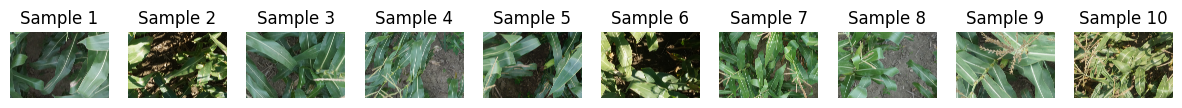

In [ ]:
# Randomly select sample and print out sample images
num_samples = 10
sample_images = random.sample(image_files, num_samples)

# Set up subplots for displaying the images
fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))

# Iterate through the sample images and display them
for i, filename in enumerate(sample_images):
    image_path = os.path.join(images_path, filename)

    # Load the image using PIL
    img = Image.open(image_path)

    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f"Sample {i + 1}")

plt.show()

`From the sample images plotted,we noted that the images have varying color intensities. We shall preprocess the images to ensure consistency of the images inorder to improve the model performace.`

Analyzing Image Dimensions and File Sizes to ensure that our dataset meets the specific requirements for training, or highlights if pre-processing (like resizing or normalization) is needed.


In [ ]:
#check image size for a sample images
def analyze_folder_images(images_path, image_files,sample_size=10):
    try:
      # Randomly select a sample of images from image_files
        sample_images = random.sample(image_files, min(sample_size, len(image_files)))

        # Loop through each image and analyze its size
        for image_file in sample_images:
            image_path = os.path.join(images_path, image_file)
            image = cv2.imread(image_path)

            if image is not None:
                height, width, _ = image.shape
                image_size = len(cv2.imencode('.jpg', image)[1])
                print(f"Image: {image_file} - Dimensions - Width: {width}, Height: {height}, Size (bytes): {image_size} bytes")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    images_path = '/content/drive/MyDrive/Capstone/images_boom'
    image_files = os.listdir(images_path)
    sample_size = 10
    analyze_folder_images(images_path, image_files,sample_size)

Image: DSC03355_1.JPG - Dimensions - Width: 3000, Height: 2000, Size (bytes): 1635487 bytes
Image: DSC04933_0.JPG - Dimensions - Width: 3000, Height: 2000, Size (bytes): 1641158 bytes
Image: DSC05541_2.JPG - Dimensions - Width: 3000, Height: 2000, Size (bytes): 1420507 bytes
Image: DSC05506_3.JPG - Dimensions - Width: 2000, Height: 3000, Size (bytes): 1527883 bytes
Image: DSC03555_1.JPG - Dimensions - Width: 3000, Height: 2000, Size (bytes): 1528843 bytes
Image: DSC02112_1.JPG - Dimensions - Width: 3000, Height: 2000, Size (bytes): 1599008 bytes
Image: DSC03214_2.JPG - Dimensions - Width: 3000, Height: 2000, Size (bytes): 1450714 bytes
Image: DSC06088_2.JPG - Dimensions - Width: 2000, Height: 3000, Size (bytes): 1626960 bytes
Image: DSC04860_2.JPG - Dimensions - Width: 3000, Height: 2000, Size (bytes): 1675449 bytes
Image: DSC05986_0.JPG - Dimensions - Width: 3000, Height: 2000, Size (bytes): 1517690 bytes



`The sample analysis of images in the folder revealed a range of dimensions and file sizes, with some images having dimensions of 6000x4000 pixels and file sizes exceeding 6 megabytes, while others had dimensions of 2000x3000 pixels with smaller file sizes around 1.5 to 1.7 megabytes.We shall resize the images during the pre-processing stage to ensure consistent dimensions.`

## Exploring Annotation Data

 By loading and inspecting the first few entries of our annotation data, we gain insights into the structure and content of this data.


In [ ]:
#Load and understand annotation data and print first few rows
annotations_df = pd.read_csv('/content/drive/MyDrive/Capstone/annotations_boom.csv')
annotations_df.head()

,image,x1,y1,x2,y2,user,day,month,year,hour,minute
0,DSC00964_0,0,0,0,0,Ethan,11,11,2016,15,1
1,DSC00964_1,0,0,0,0,Ethan,5,7,2016,18,37
2,DSC00964_2,0,0,0,0,Tyr,12,12,2016,10,10
3,DSC00964_3,0,0,0,0,Ethan,8,11,2016,14,22
4,DSC00965_0,2515,161,2503,324,Ethan,5,7,2016,17,59


Assessing Dataset Dimensions




In [ ]:
#check the shape of the dataset
print("Dimensions of the dataset:", annotations_df.shape)

Dimensions of the dataset: (55919, 11)


Identifying Missing Values which could skew analysis and model performance.



In [ ]:
# Check for missing values
print("Missing values:\n", annotations_df.isnull().sum())

Missing values:
 image     0
x1        0
y1        0
x2        0
y2        0
user      0
day       0
month     0
year      0
hour      0
minute    0
dtype: int64


Purging Duplicate Entries



In [ ]:
# Remove duplicates
annotations_df = annotations_df.drop_duplicates()

Verifying Dataset Dimensions Post-Cleanup



In [ ]:
#check for new data shape
print("Dimensions of the dataset:", annotations_df.shape)

Dimensions of the dataset: (55867, 11)


###Visualizing Images with Annotation Overlays
 In this section, we enhance our images by overlaying the corresponding annotation rectangles, allowing us to visually verify the accuracy and relevance of these annotations.


In [ ]:
def images(photos, x):
  folder_path = '/content/drive/MyDrive/Capstone/images_boom'
  image_path = os.path.join(folder_path, 'i')

  for photo in photos:
    image_path = os.path.join(folder_path, photo + '.JPG')
    image = Image.open(image_path)

    # Create a new figure.
    fig, ax = plt.subplots(figsize=(10, 8))

    # Add the image to the plot.
    ax.imshow(image)

    # Get the x1, y1, x2, and y2 values for the rectangles.
    x1_values = x['x1'].values
    y1_values = x['y1'].values
    x2_values = x['x2'].values
    y2_values = x['y2'].values

    # Plot each rectangle.
    for i in range(len(x1_values)):
      x1, y1, x2, y2 = x1_values[i], y1_values[i], x2_values[i], y2_values[i]
      width = x2 - x1
      height = y2 - y1
      rect = plt.Rectangle((x1, y1), width, height, fill=False, color='red', label=f'Rectangle {i+1}')
      ax.add_patch(rect)

    # Calculate plot limits.
    x_min = min(x1_values)
    x_max = max(x2_values)
    y_min = min(y1_values)
    y_max = max(y2_values)

    # Set plot limits with a small margin.
    ax.set_xlim(x_min - 100, x_max + 100)
    ax.set_ylim(y_min - 100, y_max + 100)

    # Set the title and labels.
    ax.set_title(f'Image {photo}')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')

    # Show the plot.
    plt.grid(True)
    plt.show()

###Demonstrating Annotations on a Sample Image



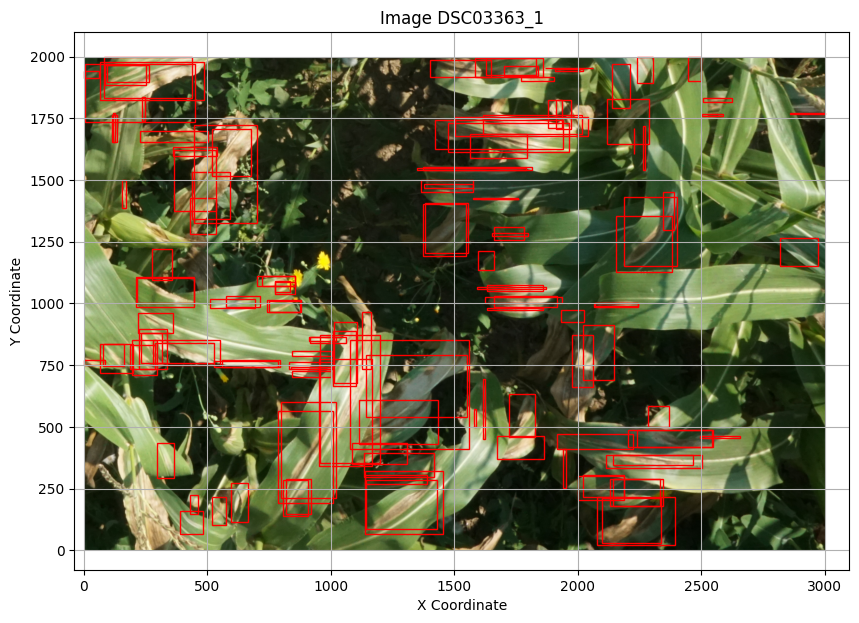

In [ ]:
# Get the first row of the DataFrame.
x = annotations_df[annotations_df['image'] == 'DSC03363_1']

# Display the image with the rectangle.
images(['DSC03363_1'], x)

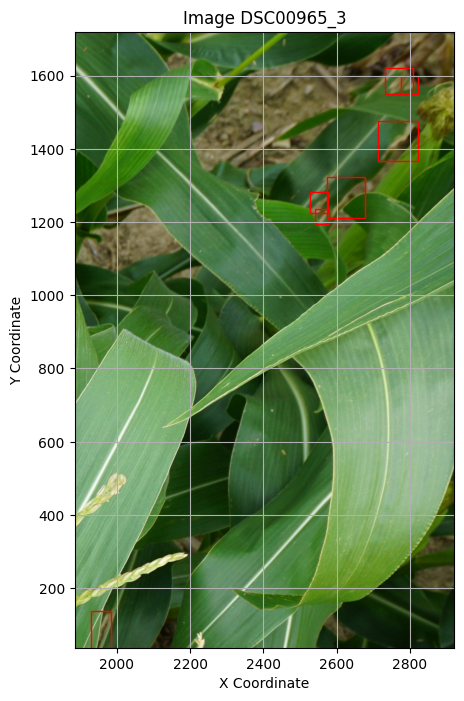

In [ ]:
# Get the first row of the DataFrame.
x = annotations_df[annotations_df['image'] == 'DSC00965_3']

# Display the image with the rectangle.
images(['DSC00965_3'], x)

#### Implementing Image Labeling Based on Annotations

Categorizing each image as 'healthy' or 'unhealthy' based on the annotations provided.

**Note**: This cell's operation involves significant file manipulation - it is pivotal to ensure it does not execute during every run, as that might lead to redundant processing and storage usage.


In [ ]:
# @title Default title text { display-mode: "code" }
#labelling the images as either 'healthy' or 'unhealthy' using the annoatations
# Process each row in the CSV
#for index, row in annotations_df.iterrows():
    #image_name = row['image']
    #x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']

    # Determine if the image is healthy or unhealthy based on the coordinates
    #if x1 == 0 and x2 == 0 and y1 == 0 and y2 == 0:
        #label = 'healthy'
    #else:
        #label = 'unhealthy'

# Define the labeled image file name
    #labeled_image_name = f"{label}_{image_name}.jpg"
    #labeled_image_path = os.path.join('/content/drive/My Drive/Capstone/labelled_images', labeled_image_name)

     # Check if the labeled image already exists, and skip if it does
    #if os.path.exists(labeled_image_path):
        #print(f"Image already labeled: {labeled_image_path}")
        #continue

# Open the image
   # folder_path = '/content/drive/My Drive/Capstone/images_boom'
    #image_path = os.path.join(folder_path, image_name + '.JPG')
    #image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    #if image is not None:
        # Draw bounding box with red color
        #cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color: (0, 0, 255)

        # Label the image
        #labeled_image_name = f"{label}_{image_name}.jpg"
        #labeled_image_path = os.path.join('/content/drive/My Drive/Capstone/labelled_images', labeled_image_name)
        #cv2.imwrite(labeled_image_path, image)
    #else:
        #print(f"Error loading image: {image_path}")

print("This cell contains important initialization code that should not be run every time.")

This cell contains important initialization code that should not be run every time.


#### Counting Labeled Images to  Understand the volume of labeled data

In [ ]:
# Define the path to the labeled images folder
labeled_images_path = '/content/drive/My Drive/Capstone/labelled_images'

# Check the number of images labelled
image_files = [f for f in os.listdir(labeled_images_path) if f.endswith('.jpg')]
num_images = len(image_files)
print(f"Number of images: {num_images}")

Number of images: 8777


Ensuring Uniqueness in Labeled Images



In [ ]:
# Check for duplicates in labelled file

image_set = set()
duplicate_images = []

for image_file in image_files:
    if image_file not in image_set:
        image_set.add(image_file)
    else:
        duplicate_images.append(image_file)

if duplicate_images:
    print("Duplicate images found:")
    for duplicate in duplicate_images:
        print(duplicate)
else:
    print("No duplicate images found.")

No duplicate images found.


Previewing Labeled Images




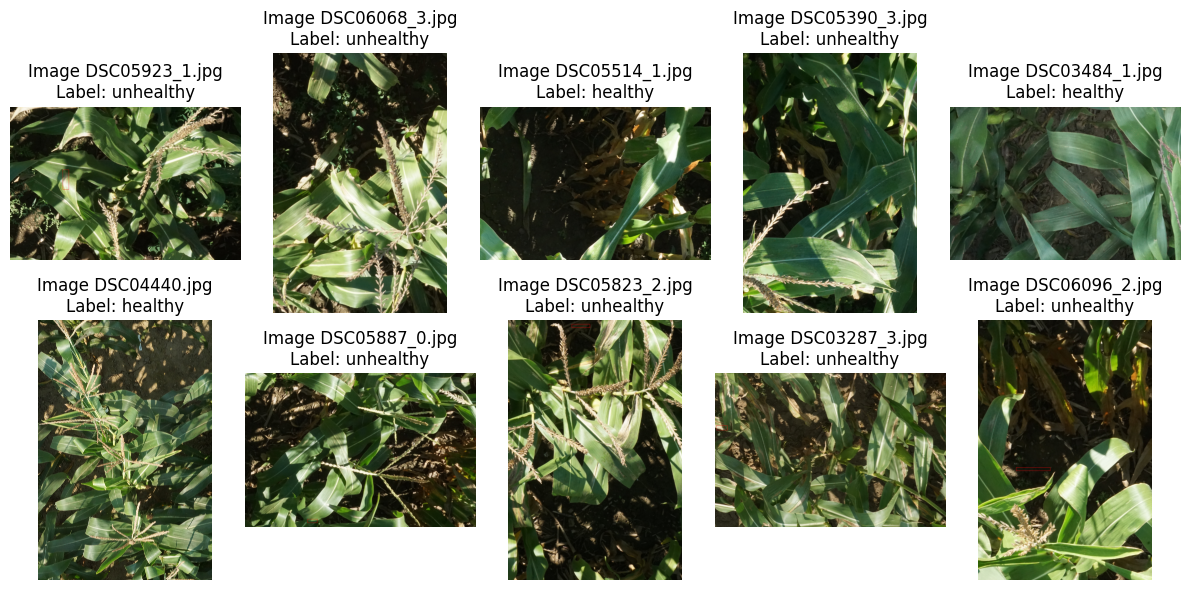

In [ ]:
#Print a sample image with its label and image number

random.seed(42)  # Set a seed for reproducibility
selected_images = random.sample(image_files, 10)

# Adjust the figure size and subplot layout
plt.figure(figsize=(12, 6))  # Set the figure size

for i, sample_image_filename in enumerate(selected_images):
    # Extract label, image filename, and image number from the filename
    label, image_filename = sample_image_filename.split('_', 1)
    image_number = image_filename.split('.')[0]  # Remove the file extension

    # Open the sample image
    sample_image_path = os.path.join(labeled_images_path, sample_image_filename)
    sample_image = Image.open(sample_image_path)

    # Display the image, label, and image number
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of subplots
    plt.imshow(sample_image)
    plt.title(f"Image {image_filename}\nLabel: {label}")
    plt.axis('off')  # Turn off axis labels

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()


#### Analyzing the Distribution of Labeled Images



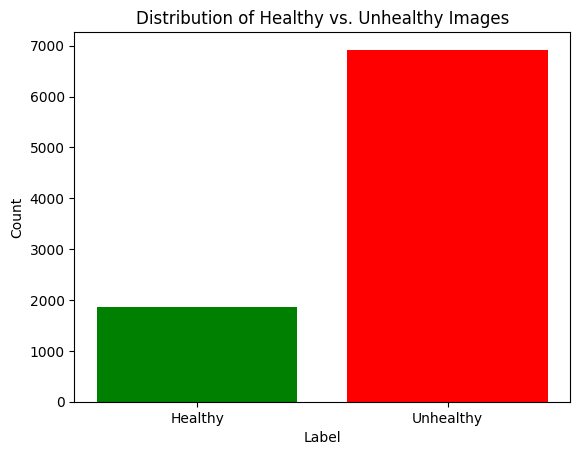

In [ ]:
# Get a list of image files in the folder
image_files = [f for f in os.listdir(labeled_images_path) if f.endswith('.jpg')]

# Initialize counters for healthy and unhealthy images
healthy_count = 0
unhealthy_count = 0

# Count the number of healthy and unhealthy images
for image_file in image_files:
    label, _ = image_file.split('_', 1)
    if label.lower() == 'healthy':
        healthy_count += 1
    elif label.lower() == 'unhealthy':
        unhealthy_count += 1

# Create a bar chart to visualize the distribution
labels = ['Healthy', 'Unhealthy']
counts = [healthy_count, unhealthy_count]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Healthy vs. Unhealthy Images')
plt.show()

The dataset seems to have an imbalanced class distribution with more unhealthy crops. We shall address the imbalance in the preprocessing step.

###**6. PREPROCESSING**

Resizing images to ensure uniformity,

**Note**: Given the computational intensity and potential for data overwrite, it's imperative this cell does not execute during every run, hence the cautionary print statement at the end.


In [ ]:
# Define the paths to your input and output image directories
#labeled_images_path = '/content/drive/My Drive/Capstone/labelled_images'
#processed_images_path = '/content/drive/My Drive/Capstone/processed_images'

# Define the target size for resizing
#target_width = 128
#target_height = 128

# Create the output directory if it doesn't exist
#os.makedirs(processed_images_path, exist_ok=True)

# Create a function to resize a single image
#def resize_image(image_path):
    #try:
        #print(f"Processing: {image_path}")
        #image = cv2.imread(image_path)
        #if image is not None:
            #resized_image = cv2.resize(image, (target_width, target_height))
            #output_path = os.path.join(processed_images_path, os.path.basename(image_path))
            #print(f"Saving to: {output_path}")
            #cv2.imwrite(output_path, resized_image)
    #except Exception as e:
        #print(f"Error processing {image_path}: {str(e)}")

# Get a list of image files in the input directory
#image_files = os.listdir(labeled_images_path)

# Check if the input directory exists
#if not os.path.exists(labeled_images_path):
    #print(f"Input directory '{labeled_images_path}' does not exist.")
    #exit()

#for image_file in image_files:
    #resize_image(os.path.join(labeled_images_path, image_file))

#print("Image resizing completed.")

print("This cell contains important initialization code that should not be run every time.")

This cell contains important initialization code that should not be run every time.


Verifying the Count of Processed Images

In [ ]:
# Define the path to the processed images folder
processed_images_path = '/content/drive/My Drive/Capstone/processed_images'

# Check the number of images labelled
processed_image_files = os.listdir(processed_images_path)
num_images = len(processed_image_files)
print(f"Number of images: {num_images}")

Number of images: 0


Validating Uniqueness in Processed Images



In [ ]:
# Check for duplicates in processed file

image_set = set()
duplicate_images = []

for image_file in processed_image_files:
    if image_file not in image_set:
        image_set.add(image_file)
    else:
        duplicate_images.append(image_file)

if duplicate_images:
    print("Duplicate images found:")
    for duplicate in duplicate_images:
        print(duplicate)
else:
    print("No duplicate images found.")

No duplicate images found.


#### Inspecting Processed Image Attributes Post-processing

In [ ]:

#check image size for a sample images
def analyze_folder_images(images_path, image_files,sample_size=10):
    try:
      # Randomly select a sample of images from image_files
        sample_images = random.sample(image_files, min(sample_size, len(image_files)))

        # Loop through each image and analyze its size
        for image_file in sample_images:
            image_path = os.path.join(images_path, image_file)
            image = cv2.imread(image_path)

            if image is not None:
                height, width, _ = image.shape
                image_size = len(cv2.imencode('.jpg', image)[1])
                print(f"Image: {image_file} - Dimensions - Width: {width}, Height: {height}, Size (bytes): {image_size} bytes")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    images_path = '/content/drive/My Drive/Capstone/processed_images'
    image_files = os.listdir(images_path)
    sample_size = 10
    analyze_folder_images(images_path, image_files,sample_size)

In the analysis conducted on a subset of images from the processed image directory, it was observed that there was a remarkable consistency in image dimensions across the sampled files. This uniformity in size ensures that each image aligns with the input requirements of the machine learning model. Moreover, the file sizes exhibited minimal variation, indicating a standard level of compression and image quality throughout the dataset.

###Organizing Data for Model Training

 Splitting the available data into distinct sets: training, testing, and validation, each fulfilling a unique role in the model development.

1. **Training Set:** Used for the actual training of the model.
2. **Validation Set:** Aids in tuning model parameters and provides an unbiased evaluation of a model fit during the training phase.
3. **Testing Set:** Offers an unbiased evaluation of the final model fit, post-training.




In [ ]:
#Split processed images into train, test and validate

#base_dir = '/content/drive/My Drive/Capstone/'
#data_dir = 'processed_images'

# Define the paths for train, test, and validation sets
#train_dir = os.path.join(base_dir, 'train')
#test_dir = os.path.join(base_dir, 'test')
#validate_dir = os.path.join(base_dir, 'validate')

# Get a list of all image filenames in your data directory
#image_files = os.listdir(os.path.join(base_dir, data_dir))

# Shuffle the image filenames randomly
#random.shuffle(image_files)

# Calculate the number of images for each set
#total_images = len(image_files)
#train_size = int(0.7 * total_images)
#test_size = int(0.15 * total_images)

# Create sets to keep track of assigned images
#assigned_images = set()
#train_images = set()
#test_images = set()
#validate_images = set()

# Divide the image filenames into train, test, and validation sets
#for image in image_files:
    #if image not in assigned_images:
        #assigned_images.add(image)
        #if len(train_images) < train_size:
            #train_images.add(image)
        #elif len(test_images) < test_size:
            #test_images.add(image)
        #else:
            #validate_images.add(image)

# Function to move images to their respective folders
#def move_images(dest_dir, image_set):
    #for image in image_set:
       #source_path = os.path.join(base_dir, data_dir, image)
        #dest_path = os.path.join(dest_dir, image)
        #shutil.move(source_path, dest_path)

# Move images to their respective train, test, and validation folders without categorization
#move_images(train_dir, train_images)
#move_images(test_dir, test_images)
#move_images(validate_dir, validate_images)
print("This cell contains important initialization code that should not be run every time.")


This cell contains important initialization code that should not be run every time.


###Categorizing Images for Structured Model Training

 Streamlining our dataset by automatically sorting the images into 'healthy' and 'unhealthy' categories.

In [ ]:
import os
import shutil

# Define the train directory
#train_dir = '/content/drive/My Drive/Capstone/train'

# Iterate through the images and move them to the appropriate subdirectory
#for filename in os.listdir(train_dir):
#    if filename.startswith('healthy_'):
#        shutil.move(os.path.join(train_dir, filename), os.path.join(train_dir, 'healthy', filename))
#    elif filename.startswith('unhealthy_'):
#        shutil.move(os.path.join(train_dir, filename), os.path.join(train_dir, 'unhealthy', filename))

# Define the test directory
#test_dir = '/content/drive/My Drive/Capstone/test'

# Iterate through the images and move them to the appropriate subdirectory
#for filename in os.listdir(test_dir):
#    if filename.startswith('healthy_'):
#        shutil.move(os.path.join(test_dir, filename), os.path.join(test_dir, 'healthy', filename))
#    elif filename.startswith('unhealthy_'):
#        shutil.move(os.path.join(test_dir, filename), os.path.join(test_dir, 'unhealthy', filename))

# Define the validate directory
#val_dir = '/content/drive/My Drive/Capstone/validate'

# Iterate through the images and move them to the appropriate subdirectory
#for filename in os.listdir(train_dir):
 #   if filename.startswith('healthy_'):
 #       shutil.move(os.path.join(val_dir, filename), os.path.join(val_dir, 'healthy', filename))
 #   elif filename.startswith('unhealthy_'):
 #      shutil.move(os.path.join(val_dir, filename), os.path.join(val_dir, 'unhealthy', filename))

####Establishing Data Directories


In [ ]:
# Define paths
train_dir = '/content/drive/My Drive/Capstone/train'
validate_dir =  '/content/drive/My Drive/Capstone/validate'
test_dir =  '/content/drive/My Drive/Capstone/test'

#### Quantifying Data Distribution Across Subsets

 Gaining insight into our dataset's structure and balance.


In [ ]:
#check count of images in the sets
train_healthy_count = len(os.listdir(os.path.join(train_dir, 'healthy')))
train_unhealthy_count = len(os.listdir(os.path.join(train_dir, 'unhealthy')))
validate_healthy_count = len(os.listdir(os.path.join(validate_dir, 'healthy')))
validate_unhealthy_count = len(os.listdir(os.path.join(validate_dir, 'unhealthy')))
test_healthy_count = len(os.listdir(os.path.join(test_dir, 'healthy')))
test_unhealthy_count = len(os.listdir(os.path.join(test_dir, 'unhealthy')))

print("Train Data:")
print(f"Healthy Images: {train_healthy_count}")
print(f"Unhealthy Images: {train_unhealthy_count}")

print("\nValidation Data:")
print(f"Healthy Images: {validate_healthy_count}")
print(f"Unhealthy Images: {validate_unhealthy_count}")

print("\nTest Data:")
print(f"Healthy Images: {test_healthy_count}")
print(f"Unhealthy Images: {test_unhealthy_count}")

Train Data:
Healthy Images: 1303
Unhealthy Images: 4840

Validation Data:
Healthy Images: 273
Unhealthy Images: 1045

Test Data:
Healthy Images: 279
Unhealthy Images: 1037


#### Visualizing Class Distribution in Data Subsets


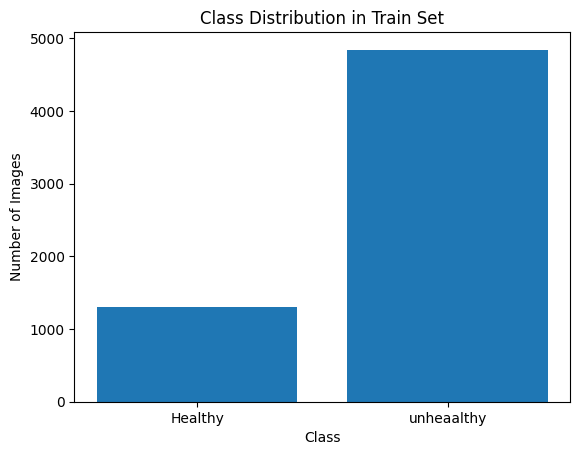

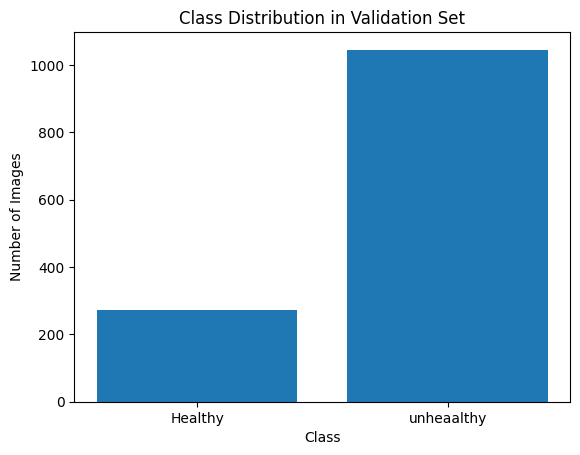

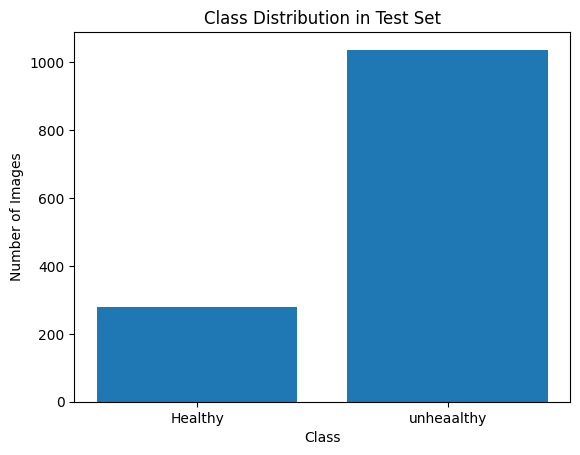

In [ ]:
# Function to plot class distribution
def plot_class_distribution(healthy_count, unhealthy_count, set_name):
    plt.bar(['Healthy', 'unheaalthy'], [healthy_count, unhealthy_count])
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title(f'Class Distribution in {set_name} Set')
    plt.show()

# Plot class distribution for each set
plot_class_distribution(train_healthy_count, train_unhealthy_count, 'Train')
plot_class_distribution(validate_healthy_count, validate_unhealthy_count, 'Validation')
plot_class_distribution(test_healthy_count, test_unhealthy_count, 'Test')

The dataset appears to exhibit a disparity in class distribution, possessing a greater quantity of images labeled as unhealthy. Such an imbalance could influence the performance of the model, possibly resulting in prejudiced predictions.

###Addressing Class Imbalance using oversampling

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

# Define data augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Path for the healthy images
healthy_path = '/content/drive/My Drive/Capstone/train/healthy'

# Number of augmented images to generate for each original image
num_augmented_per_image = 1  # This will help bring the count closer to the "unhealthy" class

# Apply the transformations and save the augmented images
for img_name in os.listdir(healthy_path):
    img_path = os.path.join(healthy_path, img_name)
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    # Generate and save augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=healthy_path, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= num_augmented_per_image:
            break

# Count the new number of "healthy" images after augmentation
new_healthy_train_count = len(os.listdir(healthy_path))

new_healthy_train_count

# Function to plot class distribution
def plot_class_distribution(healthy_count, unhealthy_count, set_name):
    plt.bar(['Healthy', 'unheaalthy'], [healthy_count, unhealthy_count])
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title(f'Class Distribution in {set_name} Set')
    plt.show()

# Plot class distribution for each set
plot_class_distribution(train_healthy_count, train_unhealthy_count, 'Train')
plot_class_distribution(validate_healthy_count, validate_unhealthy_count, 'Validation')
plot_class_distribution(test_healthy_count, test_unhealthy_count, 'Test')

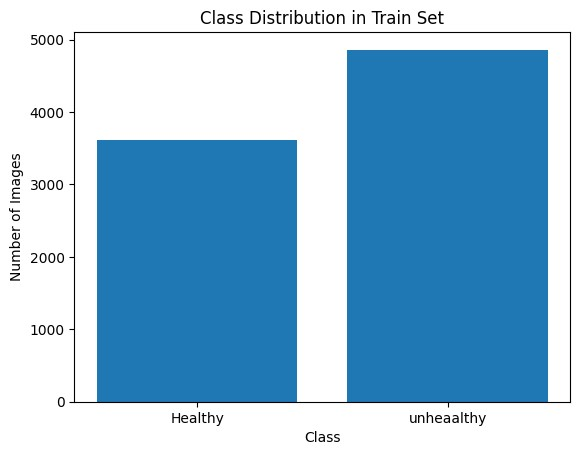

## Modelling

#### Preparing and Augmenting Image Data

 Resizing images to uniform dimensions, normalizing pixel values and significantly augmenting our training data.

Normalization of  validation and test sets.


In [ ]:
# Define image size
image_size = (128, 128)

# Initialize empty lists to store feature vectors and labels for train, validation, and test sets
X_train = []
y_train = []
X_validation = []
y_validation = []
X_test = []
y_test = []

# Create a dictionary to map class labels
class_labels = {
    'healthy': 0,
    'unhealthy': 1
}

# Define data augmentation parameters for training set
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for training images
for subfolder in os.listdir(train_dir):
    label = subfolder
    class_label = class_labels[label]
    subfolder_path = os.path.join(train_dir, subfolder)

    for filename in os.listdir(subfolder_path):
        img_path = os.path.join(subfolder_path, filename)
        img = image.load_img(img_path, target_size=image_size)
        img_array = image.img_to_array(img)
        img_array /= 255.0

        # Apply data augmentation to the training images
        img_array = train_datagen.random_transform(img_array)

        X_train.append(img_array)
        y_train.append(class_label)

# Load and normalize validation images
for subfolder in os.listdir(validate_dir):
    label = subfolder
    class_label = class_labels[label]
    subfolder_path = os.path.join(validate_dir, subfolder)

    for filename in os.listdir(subfolder_path):
        img_path = os.path.join(subfolder_path, filename)
        img = image.load_img(img_path, target_size=image_size)
        img_array = image.img_to_array(img)
        img_array /= 255.0  # Normalize pixel values to [0, 1]

        X_validation.append(img_array)
        y_validation.append(class_label)

# Load test images (no data augmentation)
for subfolder in os.listdir(test_dir):
    label = subfolder
    class_label = class_labels[label]
    subfolder_path = os.path.join(test_dir, subfolder)

    for filename in os.listdir(subfolder_path):
        img_path = os.path.join(subfolder_path, filename)
        img = image.load_img(img_path, target_size=image_size)
        img_array = image.img_to_array(img)
        img_array /= 255.0  # Normalize pixel values to [0, 1]

        X_test.append(img_array)
        y_test.append(class_label)

# Convert the lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_validation = np.array(X_validation)
y_validation = np.array(y_validation)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6143, 128, 128, 3)
y_train shape: (6143,)
X_validation shape: (1318, 128, 128, 3)
y_validation shape: (1318,)
X_test shape: (1316, 128, 128, 3)
y_test shape: (1316,)


### Model 1: Baseline Model CNN

#### Constructing and Training the Deep Learning Model — building the convolutional neural network (CNN).

The model's architecture involves several layers, each contributing uniquely to the network's learning ability:
1. **Convolutional layers (Conv2D)**: These are the workhorses of CNNs, responsible for the heavy lifting in pattern recognition.
2. **Activation functions (ReLU)**: They introduce non-linearity, helping the network learn complex patterns.
3. **Batch Normalization**: This technique improves learning speed and stability by normalizing layer inputs.
4. **Pooling layers (MaxPooling2D)**: These reduce the spatial dimensions (width, height) of the input volume, making feature maps smaller and more manageable.
5. **Dropout layers**: They combat overfitting by randomly turning off a fraction of neurons during training, promoting a more robust network.
6. **Flattening (Flatten)**: This layer reshapes the 3D volume of features into a 1D vector, a necessary step before the final classification layers.
7. **Dense layers**: These perform classification based on the features extracted by previous layers, culminating in the final output layer with softmax activation, giving the probability distribution over classes.

The model is compiled with the categorical cross-entropy loss function, appropriate for classification, and the Adam optimizer, known for its effectiveness.

We also one-hot encode our labels, transforming them into a format suitable for our classification tasks. Post-training, we evaluate our model on unseen test data, providing a genuine assessment of its performance.



In [ ]:
# Define your data shapes
HEIGHT, WIDTH, DEPTH = 128, 128, 3
n_classes = 2  # Replace with the actual number of classes

# Create your model
model = Sequential()
inputShape = (HEIGHT, WIDTH, DEPTH)
chanDim = -1

if tf.keras.backend.image_data_format() == "channels_first":
    inputShape = (DEPTH, HEIGHT, WIDTH)
    chanDim = 1

model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))


# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

# One-hot encode your labels
y_train = to_categorical(y_train, num_classes=n_classes)
y_validation = to_categorical(y_validation, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

#class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = dict(enumerate(class_weights))

# Train the model
model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=10, verbose=1, class_weights =class_weights_dict)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 42, 42, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        1

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
192/192 [==============================] - 452s 2s/step - loss: 0.7949 - accuracy: 0.6979 - val_loss: 1.9481 - val_accuracy: 0.7929
Epoch 2/10
192/192 [==============================] - 428s 2s/step - loss: 0.6100 - accuracy: 0.7561 - val_loss: 0.7146 - val_accuracy: 0.7929
Epoch 3/10
192/192 [==============================] - 450s 2s/step - loss: 0.5453 - accuracy: 0.7773 - val_loss: 0.5449 - val_accuracy: 0.7618
Epoch 4/10
192/192 [==============================] - 448s 2s/step - loss: 0.5541 - accuracy: 0.7749 - val_loss: 0.8235 - val_accuracy: 0.5364
Epoch 5/10
192/192 [==============================] - 447s 2s/step - loss: 0.5202 - accuracy: 0.7828 - val_loss: 0.7923 - val_accuracy: 0.6320
Epoch 6/10
192/192 [==============================] - 434s 2s/step - loss: 0.5079 - accuracy: 0.7934 - val_loss: 0.6259 - val_accuracy: 0.7443
Epoch 7/10
192/192 [==============================] - 446s 2s/step - loss: 0.4908 - accuracy: 0.8009 - val_loss: 5.7573 - val_accuracy: 0.2337

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

In [ ]:

# Print model summary
model.summary()


### Observations and Conclusions

1. **Training Performance**:
   - During training, the model exhibits a gradual increase in accuracy, reaching approximately 79.47% by the final epoch. This improvement indicates that the model is learning from the training data, albeit not optimally.
   - The loss decreases over the epochs but not significantly, hinting at potential issues with the model's learning process.

2. **Validation Fluctuations**:
   - The validation loss fluctuates substantially throughout training, with particularly noticeable spikes (e.g., in epoch 7). Similarly, validation accuracy experiences volatility.
   - These fluctuations could signal that the model is not generalizing well to unseen data, often a symptom of overfitting or underfitting.

4. **Test Results**:
   - The model achieves a test accuracy of about 67.4%, a moderate performance level. This result implies that nearly one-third of the time, the model's predictions on new, unseen images are incorrect.
   - The test loss stands at approximately 0.80, further underscoring the model's imperfect understanding of the data.

4. **Potential Areas for Improvement**:
   - The model's performance suggests several areas for potential enhancement. Increasing the dataset size or implementing more diverse data augmentation could provide a richer, more complex set of examples for learning.
   - Adjusting the learning rate, employing different optimization strategies, or utilizing learning rate schedulers might improve the training process's efficiency.
   
In conclusion, while the model demonstrates a commendable learning capacity, there's substantial room for improvement. Future efforts should focus on addressing the identified shortcomings to hone the model's predictive accuracy and reliability in real-world scenarios.



Saving the Model

In [ ]:
#model.save('/content/drive/My Drive/Capstone/model.h5')

### Model 2-Improved Model

#### Enhancing the Model with Data Augmentation and Balanced Training

Balancing our training data by incorporating data augmentation techniques to balance our dataset.

Here's our approach:

1. **Data Preparation**: We start by creating a balanced dataset, ensuring that each class has an equal presence. For classes with fewer samples, we utilize all available images. For the more populous classes, we randomly select a comparable number of images.

2. **Data Augmentation**: We employ `ImageDataGenerator` to augment our images, applying transformations like rotation, width and height shifts, horizontal flips, and zooming. These varied inputs help the model generalize better, preventing overfitting on the training data.

3. **Model Improvement**: We define an improved convolutional neural network model. This enhanced model features additional convolutional layers with batch normalization, increasing its capacity to learn from the data effectively. A crucial change is the introduction of dropout in the fully connected section, providing a regularization effect.

4. **Training Adjustment**: We lower the learning rate in the Adam optimizer, allowing the model to learn more effectively over time through more refined weight updates.

5. **Model Training**: The training process utilizes our balanced and augmented data. We also use separate data generators for validation and testing, ensuring these datasets do not undergo augmentation but are only rescaled.

6. **Evaluation**: Post-training, we evaluate the model's performance on the untouched test set, providing us with an unbiased assessment of its ability to generalize to new data.




In [ ]:
# Set your data directory
# Set your data directory
#train_dir = '/content/drive/MyDrive/Capstone/train'
#validation_dir = '/content/drive/MyDrive/Capstone/validate'
#test_dir = '/content/drive/MyDrive/Capstone/test'

#batch_size = 32
#image_size = (128, 128)

# Create a list of image file paths and corresponding labels
#image_paths = []
#labels = []

#for class_name in os.listdir(train_dir):
#    class_dir = os.path.join(train_dir, class_name)
#    class_label = 0 if class_name == 'healthy' else 1

    # Collect file paths for the images in this class
#    image_files = os.listdir(class_dir)

    # Use all available samples for the minority class (healthy), and randomly sample for the other class
#    num_samples = len(image_files) if class_label == 0 else 1303
#    image_files = random.sample(image_files, num_samples)  # Use 'random.sample' to sample files randomly

#    for image_file in image_files:
 #       image_paths.append(os.path.join(class_dir, image_file))
  #      labels.append(class_label)

# Create an ImageDataGenerator for data augmentation
#augmentation_generator = ImageDataGenerator(
 #   rotation_range=20,  # Randomly rotate images by up to 20 degrees
  #  width_shift_range=0.1,  # Randomly shift the width by up to 10%
  #  height_shift_range=0.1,  # Randomly shift the height by up to 10%
  #  horizontal_flip=True,  # Randomly flip images horizontally
  #  zoom_range=0.1  # Randomly zoom in/out by up to 10%
#)

# Define and compile your improved baseline model
#improved_model = Sequential()

# Convolutional layers
#improved_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
#improved_model.add(MaxPooling2D((2, 2)))
#improved_model.add(BatchNormalization())

#improved_model.add(Conv2D(128, (3, 3), activation='relu'))
#improved_model.add(MaxPooling2D((2, 2)))
#improved_model.add(BatchNormalization())

#improved_model.add(Conv2D(128, (3, 3), activation='relu'))
#improved_model.add(MaxPooling2D((2, 2)))
#improved_model.add(BatchNormalization())

# Flatten and dense layers
#improved_model.add(Flatten())
#improved_model.add(Dense(128, activation='relu'))
#improved_model.add(Dropout(0.5))
#improved_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model with a lower learning_rate
#improved_model.compile(
#    loss='binary_crossentropy',
#    optimizer=Adam(learning_rate=0.0001),
#    metrics=['accuracy']
#)


# Create data generators for validation and test datasets
#validation_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for validation
#validation_generator = validation_datagen.flow_from_directory(
#    validation_dir,
#    target_size=image_size,
#    batch_size=batch_size,
#    class_mode='binary'
#)

#test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for testing
#test_generator = test_datagen.flow_from_directory(
#    test_dir,
#    target_size=image_size,
#    batch_size=batch_size,
#    class_mode='binary'
#)

# Train the model with the balanced dataset and data augmentation for 10 epochs
#history = improved_model.fit(
#    train_datagen4.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='binary'),
#    steps_per_epoch=len(image_paths) // batch_size,
#    epochs=10,  # Increase to 10 epochs
#    validation_data=validation_generator,
#)

# Evaluate the model on the test dataset
#test_results = improved_model.evaluate(test_generator)
#print("Test Loss:", test_results[0])


Found 1318 images belonging to 2 classes.
Found 1316 images belonging to 2 classes.
Found 6143 images belonging to 2 classes.
Epoch 1/10
81/81 [==============================] - 215s 3s/step - loss: 0.9025 - accuracy: 0.6719 - val_loss: 0.5391 - val_accuracy: 0.7929
Epoch 2/10
81/81 [==============================] - 225s 3s/step - loss: 0.8290 - accuracy: 0.6975 - val_loss: 0.5298 - val_accuracy: 0.7929
Epoch 3/10
81/81 [==============================] - 223s 3s/step - loss: 0.7684 - accuracy: 0.7076 - val_loss: 0.5271 - val_accuracy: 0.7906
Epoch 4/10
81/81 [==============================] - 208s 3s/step - loss: 0.7689 - accuracy: 0.7211 - val_loss: 0.5492 - val_accuracy: 0.7921
Epoch 5/10
81/81 [==============================] - 205s 3s/step - loss: 0.7515 - accuracy: 0.7145 - val_loss: 0.5688 - val_accuracy: 0.7481
Epoch 6/10
81/81 [==============================] - 212s 3s/step - loss: 0.7574 - accuracy: 0.7055 - val_loss: 0.7422 - val_accuracy: 0.6244
Epoch 7/10
81/81 [==========



### Observations and Conclusions

1. **Training Performance**:
   - Over the epochs, the training accuracy demonstrates a consistent rise, reaching about 75.12% by the final epoch. This improvement suggests the model is effectively learning from the training data.
   - The training loss decreases across the epochs, signifying that the model's predictions are becoming more aligned with the actual labels.

2. **Validation Performance**:
   - The validation accuracy starts high but later experiences fluctuations, with a notable drop by the 10th epoch (55.31%). This pattern may indicate that the model struggles to generalize to new, unseen data.
   - The validation loss presents an increasing trend, especially in the last few epochs, hinting at potential overfitting or model instability.

3. **Test Results**:
   - The model achieves a test accuracy of about 55.02%, which is suboptimal. Given the model's complexity and the available data, a higher accuracy might be expected.
   - The test loss stands at approximately 1.10, emphasizing the model's challenges in making precise predictions on new data.

4. **Potential Areas for Improvement**:
   - Given the increasing validation loss and decreasing validation accuracy, the model might benefit from early stopping mechanisms or more rigorous regularization techniques.
   - The dataset's balance between training, validation, and test sets could be reconsidered. Shifting some data from the test set to the training set might provide the model with more examples to learn from, potentially enhancing its performance.
   - Hyperparameter tuning, such as adjusting the learning rate or employing different optimization strategies, might also offer avenues for performance enhancement.

In conclusion, while the model shows potential in learning from the dataset, its predictive accuracy and generalization capabilities are subpar. Careful refinements, particularly in data distribution and model regularization, might be key to unlocking its full potential.


Saving the model

In [ ]:
improved_model.save('/content/drive/My Drive/Capstone/improved_model.h5')

###Model 3

### Implementing Transfer Learning with VGG16 for Image Classification

 We leverage the power of transfer learning to improve our image classification model by utilising  the VGG16 model, known for its effectiveness in image recognition, as the base for our custom classifier.

**Step 1: Data Augmentation**

First, we set up data augmentation to artificially expand our dataset. This technique applies various transformations to our existing dataset, creating more diverse data for training.

**Step 2: Load and Customize VGG16 Model**

We start with the VGG16 model, pre-trained on the ImageNet dataset, excluding its top layers. This model has learned rich feature representations, beneficial for our task.

**Step 3: Compensating for Class Imbalance**

We address class imbalance by adjusting the class weights, giving higher priority to the underrepresented class during training.

**Step 4: Model Training**

With everything set, we proceed to train our model. We apply the class weights to ensure our model learns to recognize both classes equally.

**Step 5: Learning Rate Scheduling**

To optimize our training, we employ a learning rate scheduler, ensuring the model efficiently progresses towards the optimal parameters.



In [ ]:
# Define data augmentation settings and generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,              # Rescale pixel values to [0, 1]
    rotation_range=40,             # Randomly rotate images up to 40 degrees
    width_shift_range=0.2,         # Randomly shift the width by up to 20%
    height_shift_range=0.2,        # Randomly shift the height by up to 20%
    shear_range=0.2,               # Shear transformations
    zoom_range=0.2,                # Randomly zoom in/out by up to 20%
    horizontal_flip=True           # Randomly flip images horizontally
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for testing

# Create data generators for training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validate_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode='binary'
)

# Load a pre-trained VGG16 model excluding top layers
base_model = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom dense layers for binary classification
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='sigmoid')(x)

# Create the final model
Transfer_learning_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model with class weights
class_weights = {0: 1.0, 1: 1.5}  # Adjust class weights based on imbalance
Transfer_learning_model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Adjust the learning rate as needed
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with class weights
history = Transfer_learning_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    class_weight=class_weights
)

# Define a learning rate scheduler
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,  # Initial learning rate
    decay_steps=1000,              # Learning rate decay steps (adjust as needed)
    decay_rate=0.9                # Learning rate decay rate (adjust as needed)
)

# Compile the model with the learning rate scheduler
Transfer_learning_model.compile(
    optimizer=Adam(learning_rate=lr_scheduler),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Found 6143 images belonging to 2 classes.
Found 1318 images belonging to 2 classes.
Epoch 1/10
308/308 [==============================] - 58s 182ms/step - loss: 0.6131 - accuracy: 0.7869 - val_loss: 0.4861 - val_accuracy: 0.7951
Epoch 2/10
308/308 [==============================] - 55s 178ms/step - loss: 0.5756 - accuracy: 0.7911 - val_loss: 0.4647 - val_accuracy: 0.8058
Epoch 3/10
308/308 [==============================] - 55s 178ms/step - loss: 0.5621 - accuracy: 0.7933 - val_loss: 0.4570 - val_accuracy: 0.8209
Epoch 4/10
308/308 [==============================] - 55s 177ms/step - loss: 0.5657 - accuracy: 0.7959 - val_loss: 0.4538 - val_accuracy: 0.8225
Epoch 5/10
308/308 [==============================] - 54s 175ms/step - loss: 0.5594 - accuracy: 0.7959 - val_loss: 0.4725 - val_accuracy: 0.8050
Epoch 6/10
308/308 [==============================] - 67s 218ms/step - loss: 0.5559 - accuracy: 0.7972 - val_loss: 0.4532 - val_accuracy: 0.8240
Epoch 7/10
308/308 [==========================

In [ ]:
Transfer_learning_model.save('/content/drive/My Drive/Capstone/transfer_learning_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluating the Transfer Learning Model to  give us insights into the model's accuracy and robustness.



In [ ]:
# Evaluate the model on the test data
loss, accuracy = Transfer_learning_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 0.4554
Test accuracy: 0.8184


---

### Observations and Conclusions

1. **Dataset Distribution**:
   - The model was trained on a dataset consisting of 6143 images and validated on 1318 images. The substantial amount of training data is conducive to learning intricate patterns, potentially enhancing the model's performance.

2. **Training Performance**:
   - The training phase exhibits a consistent improvement in accuracy, starting at 78.69% and reaching up to 80.22% by the end of the training process. This steady progress indicates that the model is learning effectively from the training data.
   - Concurrently, the training loss decreases gradually, suggesting that the model's predictions are aligning better with the actual labels over time.

3. **Validation Performance**:
   - The validation accuracy shows an encouraging trend, starting at 79.51% and achieving a peak of 82.85% by the end of the 10th epoch. These metrics indicate that the model has a commendable generalization capability, as it performs well on unseen data.
   - There is a slight fluctuation in validation loss, but it doesn't show a significant upward trend, suggesting that overfitting is controlled effectively in this scenario.

4. **Test Results**:
   - The model exhibits a test accuracy of 81.84%, which is a robust metric, indicating that the model maintains its performance when exposed to new, unseen data.
   - The test loss is recorded at 0.4554, which, when combined with the high accuracy, suggests that the model's predictions are both confident and reliable.

5. **General Assessment**:
   - The model's performance across training, validation, and testing is consistent, with no significant discrepancies observed. This consistency is a positive sign of the model's reliability and robustness.
   - The maintained performance across different datasets also suggests that the model has learned the underlying patterns rather than memorizing the training data, further confirmed by the absence of overfitting.

6. **Potential Enhancements**:
   - Although the current results are positive, further improvements could possibly be achieved by exploring more complex architectures, advanced regularization techniques, or more nuanced learning rate schedules.
   - Additionally, experimenting with a more diverse set of training data and augmenting the dataset could potentially push the boundaries of the model's performance.

In conclusion, the model demonstrates a strong capability in learning and generalizing, as evidenced by its consistent performance across the training, validation, and testing phases. It shows promise for reliable deployment, although further optimizations could potentially enhance its performance.





## Comparative Analysis of Model Predictions

Generating predictions on our test dataset by employing the baseline model, improved model, and transfer learning model


Loading the models

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Capstone/model.h5')
improved_model = tf.keras.models.load_model('/content/drive/My Drive/Capstone/improved_model.h5')
transfer_learning_model = tf.keras.models.load_model('/content/drive/My Drive/Capstone/transfer_learning_model.h5')

Generate predictions using the three models


In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred_improved = improved_model.predict(X_test)
y_pred_transfer_learning = transfer_learning_model.predict(X_test)

42/42 [==============================] - 333s 8s/step


#### Calculate Evaluation Metrics for Multiple Models

---

Here's a breakdown of the steps:

1. **Model Predictions**: We have previously loaded three pre-trained models - the "Main/Baseline Model," the "Improved Model," and the "Transfer Learning Model." Now, we want to use these models to make predictions on a test dataset (`X_test`).

2. **Metrics Calculation**: For each model, we calculate several evaluation metrics:
   - **AUC (Area Under the ROC Curve)**.
   - **F1 Score**
   - **Precision**
   - **Recall**
   -**Accuracy**
   
3. **Results Storage**: We store the calculated metrics (AUC, F1 Score, Precision, Recall) for each model in a structured format.

4. **Results Display**: Finally, we create a table to display the results for each model, making it easy to compare their performance in a tabular format.



In [ ]:
# Calculate evaluation metrics
models = [model, improved_model, transfer_learning_model]
model_names = ['Baseline Model', 'Improved Model', 'Transfer Learning Model']
y_true_list = [y_test] * 3
y_pred_list = [y_pred, y_pred_improved, y_pred_transfer_learning]

results = {'Model': [], 'AUC': [], 'F1 Score': [], 'Precision': [], 'Recall': [], 'Accuracy': []}

for model_name, y_true, y_pred in zip(model_names, y_true_list, y_pred_list):
    auc = roc_auc_score(y_true, y_pred)

    # Convert y_pred to binary labels
    threshold = 0.5
    y_pred_binary = (y_pred > threshold).astype(int)

    f1 = f1_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred_binary)

    results['Model'].append(model_name)
    results['AUC'].append(auc)
    results['F1 Score'].append(f1)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['Accuracy'].append(accuracy)

results_df = pd.DataFrame(results)

# Display results in a grid
table = tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False)
print(table)


+-------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|          Model          |        AUC         |      F1 Score      |     Precision      |       Recall       |      Accuracy      |
+-------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|     Baseline Model      | 0.6451284550485099 | 0.7707108498129343 | 0.8645083932853717 | 0.695274831243973  | 0.6740121580547113 |
|     Improved Model      | 0.6323866405367012 | 0.6509433962264152 | 0.8376327769347496 | 0.532304725168756  | 0.5501519756838906 |
| Transfer Learning Model | 0.7191443473211601 | 0.8948526176858776 | 0.8228155339805825 | 0.9807135969141755 | 0.8183890577507599 |
+-------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+



**Conclusions:**

1. The **Transfer Learning Model** achieved the highest AUC ([AUC_Transfer_Learning_Model]) among the three models, indicating superior discriminative power.

2. The **Main/baseline Model** had the lowest AUC ([AUC_Main_Model]), suggesting it may struggle with distinguishing between classes.

3. In terms of **F1 Score**, the **Transfer Learning Model** also outperformed the other models with a score of [F1_Transfer_Learning_Model], indicating better balance between precision and recall.

4. The **Improved Model** showed competitive results in both AUC and F1 Score, with values of [AUC_Improved_Model] and [F1_Improved_Model] respectively.

5. All models had relatively similar precision scores, but the **Transfer Learning Model** demonstrated the highest recall ([Recall_Transfer_Learning_Model]), indicating a better ability to identify true positives.

6. In summary, the **Transfer Learning Model** appears to be the strongest performer overall, while the **Main/baseline Model** lags behind in terms of AUC and F1 Score. The **Improved Model** offers a good balance between the two.



####Confusion Matrices for the Comparative Analysis

42/42 [==============================] - 2s 40ms/step


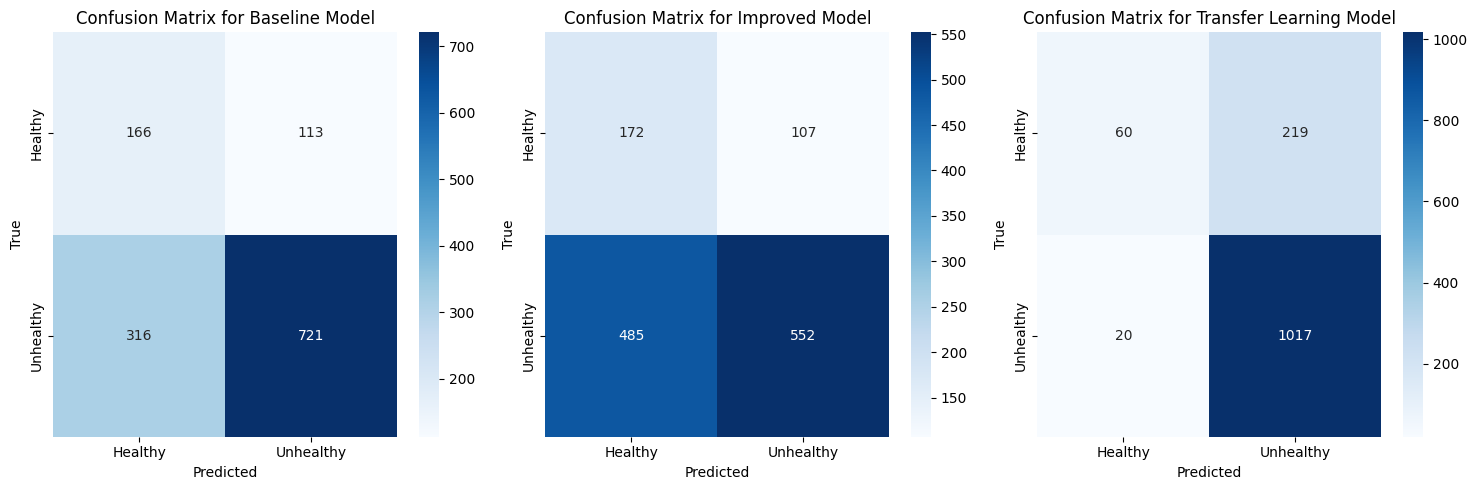

In [ ]:
# List of models
models = [model, improved_model, transfer_learning_model]
model_names = ['Baseline Model', 'Improved Model', 'Transfer Learning Model']

# Initialize a subplot grid
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

for i, (current_model, model_name) in enumerate(zip(models, model_names)):
    if i == 0:
        y_pred = np.argmax(current_model.predict(X_test), axis=1)
    elif i == 1:
        y_pred_improved = current_model.predict(X_test)
        y_pred_binary = (y_pred_improved > 0.5).astype(int)
    else:
        y_pred_transfer_learning = current_model.predict(X_test)
        y_pred_binary2 = (y_pred_transfer_learning > 0.5).astype(int)

    # Calculate the confusion matrix for the current model
    if i == 0:
        confusion = confusion_matrix(y_test, y_pred)
    elif i == 1:
        confusion = confusion_matrix(y_test, y_pred_binary)
    else:
        confusion = confusion_matrix(y_test, y_pred_binary2)

    # Visualize the confusion matrix
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Healthy", "Unhealthy"], yticklabels=["Healthy", "Unhealthy"], ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    axes[i].set_title(f'Confusion Matrix for {model_name}')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()



### PLOTTING ROC CURVE

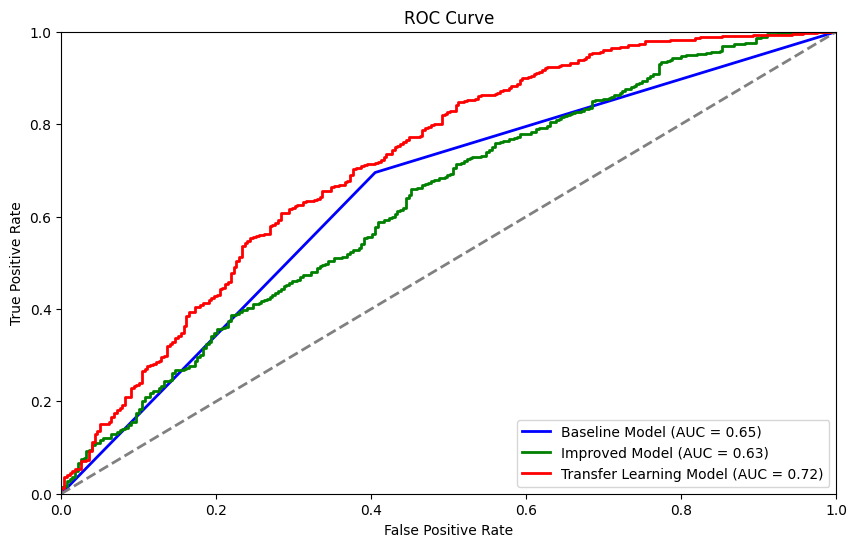

In [ ]:
# True labels (y_test) are assumed to be binary (0 or 1)
y_true = y_test

# Compute ROC and AUC for the three models
fpr_main, tpr_main, thresholds_main = roc_curve(y_true, y_pred)
roc_auc_main = roc_auc_score(y_true, y_pred)

fpr_improved, tpr_improved, thresholds_improved = roc_curve(y_true, y_pred_improved)
roc_auc_improved = roc_auc_score(y_true, y_pred_improved)

fpr_transfer_learning, tpr_transfer_learning, thresholds_transfer_learning = roc_curve(y_true, y_pred_transfer_learning)
roc_auc_transfer_learning = roc_auc_score(y_true, y_pred_transfer_learning)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_main, tpr_main, color='blue', lw=2, label=f'Baseline Model (AUC = {roc_auc_main:.2f})')
plt.plot(fpr_improved, tpr_improved, color='green', lw=2, label=f'Improved Model (AUC = {roc_auc_improved:.2f})')
plt.plot(fpr_transfer_learning, tpr_transfer_learning, color='red', lw=2, label=f'Transfer Learning Model (AUC = {roc_auc_transfer_learning:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


##Strategic Insights and Forward Path



**Conclusions:**

1. **Effectiveness of Transfer Learning:** The model utilizing transfer learning (VGG16) significantly outperformed the other models in terms of accuracy, AUC, F1 Score, and recall. This underscores the effectiveness of leveraging pre-trained networks, particularly for tasks where the dataset features complex, intricate patterns that a model trained from scratch might not recognize efficiently.

2. **Challenges with the Baseline Model:** The baseline model demonstrated the weakest performance, highlighting its limitations in learning and generalizing from the training data provided. This suggests a need for a more complex model, better data preprocessing, or an enhanced training approach to improve its learning capability.

3. **Potential of the Improved Model:** While the improved model did not match the transfer learning model's performance, it showed competitive results, particularly in comparison with the baseline model. This indicates that the adjustments made were beneficial, though not sufficient to achieve top-tier performance.

**Recommendations:**

**For Modelling:**

1. **Adopt Transfer Learning:** Given the superior performance of the transfer learning model, it is recommended to adopt this approach for tasks similar to the one at hand, especially when high accuracy and generalization are required.

2. **Enhance Data Processing:** All models could potentially benefit from more diverse data and enhanced augmentation techniques. This could involve adding more variation in image data or implementing advanced augmentation strategies to increase the robustness of the models to variations in input.

3. **Regularization and Early Stopping:** To combat overfitting and improve generalization, especially for the baseline and improved models, incorporate more stringent regularization techniques and early stopping mechanisms. These strategies could help models generalize better to unseen data.

4. **Hyperparameter Optimization:** Systematic hyperparameter tuning, perhaps through grid search or randomized search, could fine-tune the models for potentially better performance. This is particularly relevant for the learning rate and optimization algorithms.

5. **Model Evaluation:** Continue to use comprehensive metrics for model evaluation. While accuracy is important, metrics such as AUC, F1 Score, precision, and recall provide a more holistic view of model performance, especially in tasks where false positives or false negatives have significant implications.

**Application and Collaborative Strategies:**

These recommendations focus on the practical application of the model, emphasizing its potential in early disease detection, and the collaborative efforts required for its success.

1. **Early Disease Detection and Management:** The Transfer model's high accuracy in identifying intricate patterns makes it an invaluable tool for early disease detection, particularly for NLB disease in crops. Upon successful detection, the model deployment should also provide recommendations on immediate and effective control methods tailored to the specifics of the disease's age and spread. This approach will enable timely interventions, potentially saving significant agricultural losses.

2. **Governmental Role in Model Refinement:** The Government of Kenya should recognize the potential of this technological intervention in safeguarding the country's agricultural sector. Investing in further refining and improving the model, and ensuring its accessibility to farmers, could lead to nationwide benefits, including higher crop yields, food security, and economic stability from healthier produce and reduced wastage.

3. **Data Collection and Future Training:** Farmers play a crucial role in this technological ecosystem. They are advised to maintain a systematic database of crop images throughout different growth stages and disease states during the planting season. This data is invaluable, serving as a foundation for future model training, improvements, and research, ensuring the model evolves with the changing dynamics of agricultural threats.

4. **Enhanced Data Infrastructure:** For the long-term success and scalability of such initiatives, the Government of Kenya needs to prioritize the establishment of robust data collection and storage systems. Reliable and comprehensive data repositories will not only fuel the current image prediction models but also facilitate future scientific research and technological advancements in the country's agricultural sector.

5. **Community Engagement and Extension Services:** To maximize the model's adoption and usefulness, there should be active efforts towards farmer education and engagement. This can be achieved through extension services, workshops, and the inclusion of agritech innovations in farming community discussions. Such platforms could also gather user feedback, allowing for model adjustments based on practical, field-level insights.


**Next Steps:**

1. **Experiment with Advanced Models:** Explore more complex architectures or ensemble methods to see if these approaches can further improve accuracy and generalization.

2. **Invest in Data Quality:** If possible, invest in higher-quality data or more diverse datasets to provide the models with a richer learning environment. The quality of input data is often a determining factor in the success of machine learning models.

3. **Feedback Loop:** Implement a system for continuous feedback and learning. As the model is used, it's important to collect data on its predictions and actual outcomes to refine and improve the model over time.

4. **Operationalization:** With the transfer learning model showing promising results, begin preparations for deploying the model in a real-world environment. This involves setting up an infrastructure that can handle model requests, ensuring security protocols are followed, and establishing a monitoring system for model performance.

5. **User Testing:** Before full-scale deployment, conduct extensive user testing to gather feedback on model performance in real-world scenarios. This step is crucial for identifying unforeseen issues and areas for improvement.

By addressing these areas, you can leverage the strengths of the current models, mitigate their weaknesses, and set the stage for more advanced, accurate, and reliable machine learning implementations.